# BERT Prediction Error Analysis

As the result of text classification by 3 types of BERT models ( BERT_BASED_UNCASED, BERT_LARGE_UNCASED, DISTILBERT), it is found that:
 - The smaller the model is, the higher the accuracies. Distilbert achieved 77.8% in contrast that Bert_large_uncased only achieved 70& around.

In order to improve the accuracy level, we will perform the further study on those records whose prediction result are wrong, and see whether there are some ways.

Given Bert_large_uncased does not achieved high accuracy, in order to save the potential efforts, we take the remaining 2 models for the error analysis.

In [1]:
import warnings
# Disable 3 types of warning
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=(FutureWarning))
warnings.filterwarnings("ignore",category=(RuntimeWarning))

##### import error data

In [60]:
import pandas as pd

# import bert test error data
error_data_path="./tmp/test_error_2022-10-09.csv"
error_data=pd.read_csv(error_data_path)

# import bert full test data
test_data_path="./tmp/test_full_2022-10-09.csv"
test_data=pd.read_csv(test_data_path)

In [38]:
test_data['duplicated']=test_data.duplicated(subset=['original_text'])
test_data_unique=test_data[test_data['duplicated']==False]

In [88]:
(len(test_data)-len(test_data_unique))/len(test_data)

0.04162967584039158

In [39]:
error_data['duplicated']=error_data.duplicated(subset=['original_text'])
error_data_unique=error_data[error_data['duplicated']==False]

In [72]:
test_by=pd.DataFrame(test_data.groupby(['original_text','label']).count().reset_index()[["original_text","label"]])

In [84]:
test_by=test_by.groupby(by='original_text').count().sort_values('label',ascending=False).reset_index()

In [89]:
test_by[test_by['label']>1]

,original_text,label
0,The pattern of reducing the contestants down w...,2
1,-- -RRB-,2
2,"Berlin 1981 , ISBN 3-540-10857-2",2
3,Serbia,2
4,by Philip K. Dick .,2
5,Pakistan,2
6,.,2
7,Rolling Stone link,2
8,"New Mexico and Iowa voted Democratic in 2000 ,...",2
9,After he retired from music he worked for a pr...,2


In [90]:
len(test_by[test_by['label']>1])/len(test_data)

0.0007918036326990906

In [41]:
error_data_unique

,Unnamed: 0,original_text,label,duplicated
0,0,"Second-wave feminism , also sometimes called w...",1,False
1,1,"In My First Signs , it was not originally plan...",1,False
2,2,In an episode where Raw returned to the Manhat...,0,False
3,3,"In mathematics , hyperbolic geometry is a non-...",0,False
4,4,"Events The largest horse show in Norway , the ...",1,False
...,...,...,...,...
9585,9585,is an electronic music group created by German...,0,False
9586,9586,"They combine elements of black metal , death m...",1,False
9587,9587,"In a few special cases , an unreleased album m...",0,False
9588,9588,"Aside from this central belief , its ideology ...",0,False


In [42]:
test_data

,Unnamed: 0,original_text,label,duplicated
0,0,The Antilopine Kangaroo -LRB- Macropus antilop...,1,False
1,1,"pepper spray , for blinding people",0,False
2,2,"2 Maccabees was written in Koine Greek , proba...",0,False
3,3,Dukas 's use of rhythm and his skill as an orc...,1,False
4,4,The island of Ireland was historically divided...,1,False
...,...,...,...,...
41672,41672,"Soon afterward a new marketplace was opened , ...",1,False
41673,41673,The 1960 Formula One season featured the eleve...,1,False
41674,41674,"In a few special cases , an unreleased album m...",0,False
41675,41675,"Aside from this central belief , its ideology ...",0,False


In [43]:
test_data_unique

,Unnamed: 0,original_text,label,duplicated
0,0,The Antilopine Kangaroo -LRB- Macropus antilop...,1,False
1,1,"pepper spray , for blinding people",0,False
2,2,"2 Maccabees was written in Koine Greek , proba...",0,False
3,3,Dukas 's use of rhythm and his skill as an orc...,1,False
4,4,The island of Ireland was historically divided...,1,False
...,...,...,...,...
41672,41672,"Soon afterward a new marketplace was opened , ...",1,False
41673,41673,The 1960 Formula One season featured the eleve...,1,False
41674,41674,"In a few special cases , an unreleased album m...",0,False
41675,41675,"Aside from this central belief , its ideology ...",0,False


In [50]:
test_full=test_data_unique.merge(error_data_unique,how="left",left_on="original_text",right_on="original_text")

In [51]:
test_full

,Unnamed: 0_x,original_text,label_x,duplicated_x,Unnamed: 0_y,label_y,duplicated_y
0,0,The Antilopine Kangaroo -LRB- Macropus antilop...,1,False,NaN,NaN,NaN
1,1,"pepper spray , for blinding people",0,False,NaN,NaN,NaN
2,2,"2 Maccabees was written in Koine Greek , proba...",0,False,NaN,NaN,NaN
3,3,Dukas 's use of rhythm and his skill as an orc...,1,False,NaN,NaN,NaN
4,4,The island of Ireland was historically divided...,1,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...
39937,41672,"Soon afterward a new marketplace was opened , ...",1,False,NaN,NaN,NaN
39938,41673,The 1960 Formula One season featured the eleve...,1,False,NaN,NaN,NaN
39939,41674,"In a few special cases , an unreleased album m...",0,False,9587.0,0.0,False
39940,41675,"Aside from this central belief , its ideology ...",0,False,9588.0,0.0,False


In [46]:
test_full['duplicated']=test_full.duplicated(subset=['original_text'])
test_full_unique=test_full[test_full['duplicated']==False]

In [47]:
test_full

,Unnamed: 0_x,original_text,label_x,duplicated_x,Unnamed: 0_y,label_y,duplicated_y,duplicated
0,0,The Antilopine Kangaroo -LRB- Macropus antilop...,1,False,NaN,NaN,NaN,False
1,1,"pepper spray , for blinding people",0,False,NaN,NaN,NaN,False
2,2,"2 Maccabees was written in Koine Greek , proba...",0,False,NaN,NaN,NaN,False
3,3,Dukas 's use of rhythm and his skill as an orc...,1,False,NaN,NaN,NaN,False
4,4,The island of Ireland was historically divided...,1,False,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...
42093,41672,"Soon afterward a new marketplace was opened , ...",1,False,NaN,NaN,NaN,False
42094,41673,The 1960 Formula One season featured the eleve...,1,False,NaN,NaN,NaN,False
42095,41674,"In a few special cases , an unreleased album m...",0,False,9587.0,0.0,False,False
42096,41675,"Aside from this central belief , its ideology ...",0,False,9588.0,0.0,False,False


Text(0.5, 1.0, 'Distribution of original text length in words')

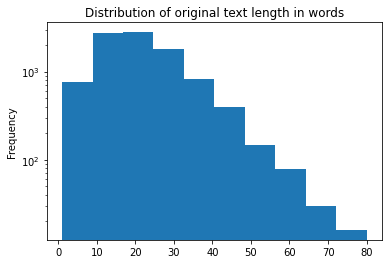

In [4]:
import matplotlib.pyplot as plt
# TRAIN SET 
error_data['original_text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Distribution of original text length in words')

In [5]:
error_data['original_text'].apply(lambda x: len(x.split())).describe()

count    9602.000000
mean       21.792960
std        11.526101
min         1.000000
25%        14.000000
50%        20.000000
75%        28.000000
max        80.000000
Name: original_text, dtype: float64

In [6]:
error_data

,Unnamed: 0,original_text,label
0,0,"Second-wave feminism , also sometimes called w...",1
1,1,In an episode where Raw returned to the Manhat...,0
2,2,Military bases Virginia Beach is home to sever...,0
3,3,"In mathematics , hyperbolic geometry is a non-...",0
4,4,"Events The largest horse show in Norway , the ...",1
...,...,...,...
9597,9597,is an electronic music group created by German...,0
9598,9598,Polly Pocket is a line of small plastic dolls ...,0
9599,9599,"In a few special cases , an unreleased album m...",0
9600,9600,"Aside from this central belief , its ideology ...",0


### Rerun the prediction to confirm the errors

In [7]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
import logging
import numpy as np

logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
                    datefmt = '%m/%d/%Y %H:%M:%S',
                    level = logging.INFO)
logger = logging.getLogger(__name__)

#MAX_SEQ_LENGTH=100
MAX_SEQ_LENGTH=80

class BertInputItem(object):
    """An item with all the necessary attributes for finetuning BERT."""

    def __init__(self, text, input_ids, input_mask, segment_ids, label_id):
        self.text = text
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_id = label_id
        

def convert_examples_to_inputs(example_texts, example_labels, label2idx, max_seq_length, tokenizer):
    """Loads a data file into a list of `InputBatch`s."""
    
    input_items = []
    examples = zip(example_texts, example_labels)
    for (ex_index, (text, label)) in enumerate(examples):

        # Create a list of token ids
        input_ids = tokenizer.encode(f"[CLS] {text} [SEP]")
        if len(input_ids) > max_seq_length:
            input_ids = input_ids[:max_seq_length]

        # All our tokens are in the first input segment (id 0).
        segment_ids = [0] * len(input_ids)

        # The mask has 1 for real tokens and 0 for padding tokens. Only real
        # tokens are attended to.
        input_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        padding = [0] * (max_seq_length - len(input_ids))
        input_ids += padding
        input_mask += padding
        segment_ids += padding

        assert len(input_ids) == max_seq_length
        assert len(input_mask) == max_seq_length
        assert len(segment_ids) == max_seq_length

        label_id = label2idx[label]

        input_items.append(
            BertInputItem(text=text,
                          input_ids=input_ids,
                          input_mask=input_mask,
                          segment_ids=segment_ids,
                          label_id=label_id))

        
    return input_items


In [9]:
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler

def get_data_loader(features, max_seq_length, batch_size, shuffle=True): 

    all_input_ids = torch.tensor([f.input_ids for f in features], dtype=torch.long)
    all_input_mask = torch.tensor([f.input_mask for f in features], dtype=torch.long)
    all_segment_ids = torch.tensor([f.segment_ids for f in features], dtype=torch.long)
    all_label_ids = torch.tensor([f.label_id for f in features], dtype=torch.long)
    data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)

    #dataloader = DataLoader(data, shuffle=shuffle, batch_size=batch_size)
    # dataloader tuning in https://pytorch.org/tutorials/recipes/recipes/tuning_guide.html
   
    dataloader = DataLoader(data, shuffle=shuffle, batch_size=batch_size,num_workers=2,pin_memory=True)
    return dataloader

BATCH_SIZE = 16

In [10]:
from tqdm import trange
from tqdm.notebook import tqdm

def evaluate(model, dataloader):
    model.eval()
    
    eval_loss = 0
    nb_eval_steps = 0
    predicted_labels, correct_labels = [], []

    for step, batch in enumerate(tqdm(dataloader, desc="Evaluation iteration")):
        batch = tuple(t.to(device) for t in batch)
        input_ids, input_mask, segment_ids, label_ids = batch

        with torch.no_grad():
            #tmp_eval_loss, logits = model(input_ids, attention_mask=input_mask,
            #                              token_type_ids=segment_ids, labels=label_ids)[:2]
            tmp_eval_loss, logits = model(input_ids, attention_mask=input_mask,
                                         labels=label_ids)[:2]  # for distilbert
        outputs = np.argmax(logits.to('cpu'), axis=1)
        label_ids = label_ids.to('cpu').numpy()
        
        predicted_labels += list(outputs)
        correct_labels += list(label_ids)
        
        eval_loss += tmp_eval_loss.mean().item()
        nb_eval_steps += 1

    eval_loss = eval_loss / nb_eval_steps
    
    correct_labels = np.array(correct_labels)
    predicted_labels = np.array(predicted_labels)
        
    return eval_loss, correct_labels, predicted_labels

In [11]:
from transformers import BertForSequenceClassification,DistilBertForSequenceClassification
from transformers import BertTokenizer,DistilBertTokenizer
import os
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Evaluate the dataset based on trained distilbert model
def data_evaluation(texts,labels,OUTPUT_DIR = "./tmp/", MODEL_FILE_NAME = "pytorch_model.bin"):
    # Convert test data of submission to features
    target_names = list(set(labels))
    label2idx = {label: idx for idx, label in enumerate(target_names)}
    
    # Enable GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Select bert model
    BERT_MODEL = "distilbert-base-uncased"
    tokenizer = DistilBertTokenizer.from_pretrained(BERT_MODEL)
    
    # Using trained model
    model_state_dict = torch.load(os.path.join(OUTPUT_DIR, MODEL_FILE_NAME), map_location=lambda storage, loc: storage)
    model=DistilBertForSequenceClassification.from_pretrained(BERT_MODEL, state_dict=model_state_dict, num_labels = len(target_names),
                                                              ignore_mismatched_sizes=True)
    model.to(device)
    
    # Convert text and labels to embeddings 
    features = convert_examples_to_inputs(texts, labels, label2idx, MAX_SEQ_LENGTH, tokenizer)
    dataloader = get_data_loader(features, MAX_SEQ_LENGTH, BATCH_SIZE, shuffle=False)
    
    # Predict the result, and discard the evaluatoin result, only take the prediction result.
    _, correct, predicted = evaluate(model, dataloader)
    print("Errors performance:", precision_recall_fscore_support(correct, predicted, average="micro"))

    #bert_accuracy = np.mean(predicted == correct)
    
    #print(bert_accuracy)
    print(classification_report(correct, predicted))

    return correct,predicted 

In [12]:
# Confirm the error data should not be predicted correctly.
texts=list(error_data["original_text"])
labels=list(error_data["label"])
data_evaluation(texts,labels)

Evaluation iteration:   0%|          | 0/601 [00:00<?, ?it/s]

Errors performance: (0.0, 0.0, 0.0, None)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    6058.0
           1       0.00      0.00      0.00    3544.0

    accuracy                           0.00    9602.0
   macro avg       0.00      0.00      0.00    9602.0
weighted avg       0.00      0.00      0.00    9602.0



(array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 1, ..., 1, 1, 1], dtype=int64))

#### Spelling error correction

In [14]:
# correct spelling error to check whether accuracy could be improved.
#from textblob import TextBlob
#error_data['correct_text_0'] = error_data['original_text'].apply(lambda x :TextBlob(x).correct())

In [15]:
from autocorrect import Speller
import re

spell=Speller(lang="en")
WORD = re.compile(r'\w+')
def reTokenize(doc):
    tokens = WORD.findall(doc)
    return tokens

text = ["Hi, welcmoe to speling.","This is jsut an exapmle, but cosnider a veri big coprus."]
def spell_correct(text):
    sptext = []
    for doc in text:
        sptext.append(' '.join([spell(w).lower() for w in reTokenize(doc)]))      
    return sptext    

print(spell_correct(text)) 

['hi welcome to spelling', 'this is just an example but consider a very big corpus']


In [16]:
from tqdm import trange
correct_text=[]
for i in trange(len(error_data)):
    correct_text.append(TextBlob(error_data['original_text'].iloc[i]).correct())
error_data['correct_text_0'] = correct_text

100%|████████████████████████████████████████████████████████████████████████████| 9602/9602 [1:03:13<00:00,  2.53it/s]


In [17]:
from tqdm import trange
correct_text=[]
for i in trange(len(error_data)):
    correct_text.append(' '.join([spell(w).lower() for w in reTokenize(error_data['original_text'].iloc[i])]))
error_data['correct_text_1'] = correct_text

100%|██████████████████████████████████████████████████████████████████████████████| 9602/9602 [08:55<00:00, 17.94it/s]


In [18]:
texts=list(error_data["correct_text_0"])
labels=list(error_data["label"])
data_evaluation(texts,labels)

Evaluation iteration:   0%|          | 0/601 [00:00<?, ?it/s]

Errors performance: (0.13903353468027493, 0.13903353468027493, 0.13903353468027493, None)
              precision    recall  f1-score   support

           0       0.25      0.19      0.21      6058
           1       0.04      0.06      0.05      3544

    accuracy                           0.14      9602
   macro avg       0.15      0.12      0.13      9602
weighted avg       0.17      0.14      0.15      9602



(array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 1, 1, 1], dtype=int64))

In [20]:
error_data

,Unnamed: 0,original_text,label,correct_text_0,correct_text_1
0,0,"Second-wave feminism , also sometimes called w...",1,"(S, e, c, o, n, d, -, w, a, v, e, , f, e, m, ...",second wave feminism also sometimes called wom...
1,1,In an episode where Raw returned to the Manhat...,0,"(I, n, , a, n, , e, p, i, s, o, d, e, , w, ...",in an episode where raw returned to the manhat...
2,2,Military bases Virginia Beach is home to sever...,0,"(M, i, l, i, t, a, r, y, , b, a, s, e, s, , ...",military bases virginia beach is home to sever...
3,3,"In mathematics , hyperbolic geometry is a non-...",0,"(I, n, , m, a, t, h, e, m, a, t, i, c, s, , ...",in mathematics hyperbolic geometry is a non eu...
4,4,"Events The largest horse show in Norway , the ...",1,"(E, v, e, n, t, s, , T, h, e, , l, a, r, g, ...",events the largest horse show in norway the ar...
...,...,...,...,...,...
9597,9597,is an electronic music group created by German...,0,"(i, s, , a, n, , e, l, e, c, t, r, o, n, i, ...",is an electronic music group created by german...
9598,9598,Polly Pocket is a line of small plastic dolls ...,0,"(F, o, l, l, y, , P, o, c, k, e, t, , i, s, ...",poll pocket is a line of small plastic dolls a...
9599,9599,"In a few special cases , an unreleased album m...",0,"(I, n, , a, , f, e, w, , s, p, e, c, i, a, ...",in a few special cases an unreleased album may...
9600,9600,"Aside from this central belief , its ideology ...",0,"(S, i, d, e, , f, r, o, m, , t, h, i, s, , ...",aside from this central belief its ideology is...


In [21]:
texts=list(error_data["correct_text_1"])
labels=list(error_data["label"])
data_evaluation(texts,labels)

Evaluation iteration:   0%|          | 0/601 [00:00<?, ?it/s]

Errors performance: (0.24421995417621328, 0.24421995417621328, 0.24421995417621328, None)
              precision    recall  f1-score   support

           0       0.39      0.34      0.36      6058
           1       0.07      0.08      0.08      3544

    accuracy                           0.24      9602
   macro avg       0.23      0.21      0.22      9602
weighted avg       0.27      0.24      0.26      9602



(array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 1, ..., 1, 1, 1], dtype=int64))

##### The above result suggests spelling check could improve 13% accuracy, however, the performance of spelling check is not encouraging.

In [ ]:
#error_data.to_csv("./tmp/error_data_20221006.csv",index=False) # export error data to csv for manual check

#### Clean text to see whether that would improve accuracy

In [ ]:
texts=list(error_data["clean_text"])
labels=list(error_data["label"])
data_evaluation(texts,labels)

In [ ]:
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_punctuation,remove_special_character,normalize_unicode,check_spelling,remove_stopword,lemmatize_word
# Preprocess text using custom preprocess functions in the pipeline 
STOPWORDS=['-RRB-','-LRB-'] # remove customized stopwords
preprocess_functions = [to_lower, remove_punctuation,remove_special_character,normalize_unicode,remove_stopword,lemmatize_word]
error_data['preprocess_text'] = error_data['correct_text_1'].apply(lambda x:' '.join(remove_stopword(preprocess_text(x,preprocess_functions),
                                                                                          stop_words=STOPWORDS)))

In [ ]:
error_data

In [ ]:
texts=list(error_data["preprocess_text"])
labels=list(error_data["label"])
data_evaluation(texts,labels)

#### The accuracy of error list was improved to 34%, and it looks like the preprocessing text do help to improve accuracy. 

In [22]:
train_data_path="./01_data/WikiLarge_Train.csv"
train_data=pd.read_csv(train_data_path)

In [23]:
correct_text=[]
for i in trange(len(train_data)):
    correct_text.append(' '.join([spell(w).lower() for w in reTokenize(train_data['original_text'].iloc[i])]))
train_data['correct_text_1'] = correct_text

100%|████████████████████████████████████████████████████████████████████████| 416768/416768 [5:00:37<00:00, 23.11it/s]


In [29]:
train_data.to_csv("./tmp/train_data_correction.csv",index=False)

##### Given the above improvement, and try to apply this to test set

In [24]:
# Loading the test data for submission
sub_data_path="./01_data/WikiLarge_Test.csv"
sub_data=pd.read_csv(sub_data_path)

In [25]:
correct_text=[]
for i in trange(len(sub_data)):
    correct_text.append(' '.join([spell(w).lower() for w in reTokenize(sub_data['original_text'].iloc[i])]))
sub_data['correct_text_1'] = correct_text

100%|████████████████████████████████████████████████████████████████████████| 119092/119092 [1:26:52<00:00, 22.85it/s]


In [ ]:
#sub_data['original_text'] = sub_data['correct_text_1'].apply(lambda x:' '.join(remove_stopword(preprocess_text(x,preprocess_functions),
#                                                                                          stop_words=STOPWORDS)))

In [30]:
sub_data.to_csv("./tmp/sub_data_correction.csv",index=False)

In [26]:
sub_texts=list(sub_data["correct_text_1"])
sub_labels=[1 for i in range(len(sub_texts))]

print("Submission Test size:", len(sub_data))

Submission Test size: 119092


In [27]:
_, sub_predicted=data_evaluation(sub_texts,sub_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([1, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluation iteration:   0%|          | 0/7444 [00:00<?, ?it/s]

Errors performance: (1.0, 1.0, 1.0, None)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119092

    accuracy                           1.00    119092
   macro avg       1.00      1.00      1.00    119092
weighted avg       1.00      1.00      1.00    119092



In [28]:
# Produce the submission file
df_sub=pd.DataFrame(columns=["id","label"])
df_sub['label']=sub_predicted
df_sub['id']=[i for i in range(len(sub_predicted))]
df_sub.to_csv("./tmp/submission.csv",index=False)

### Embedding-based clustering analysis

In [ ]:
# Other utils
from tqdm import tqdm  # Progress bar
# Transformers
from transformers import pipeline
import ipywidgets as widgets
from transformers import pipeline
from sentence_transformers import SentenceTransformer

In [ ]:
#onlinemodel='distiluse-base-multilingual-cased-v2'
onlinemodel="all-mpnet-base-v2"
embedder = SentenceTransformer(onlinemodel)

In [ ]:
queries= list(error_data['original_text'])
query_embeddings=embedder.encode(queries)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Elbow criterion - Determine optimal numbers of clusters by elbow rule.
def elbow_plot(data, maxK=15, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = []
    K= range(1, maxK)
    for k in K:
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            #data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            #data["clusters"] = kmeans.labels_
        print("k: ", k,"sse: ",kmeans.inertia_)
        # Inertia: Sum of distances of samples to their closest cluster center
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(K,sse,'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return kmeans.labels_

In [ ]:
# Run Elbow for full training data
elbow_plot(query_embeddings)

In [ ]:
# Create clustering dataframe 
def df_clustering(queries, embeddings, labels=None, clusters=2):
    """
        parameters:
        - queries: list of queries
        - embeddings: list of embeddings corresponding to queries
        - clusters: no. of clusters for kmeans
    """
    num_clusters = clusters
    clf = KMeans(n_clusters=num_clusters, 
                max_iter=100, 
                init='k-means++', 
                n_init=1)
    clf.fit_predict(embeddings)
    cluster_assignment = clf.labels_

    cdf=pd.DataFrame(columns=["cluster_id","sentence_id","sentence",'label'])

    cdf['cluster_id']=clf.labels_
    cdf['sentence_id']=[i for i in range(len(clf.labels_))]
    cdf['sentence']=queries
    cdf['label']=labels
                                            
    return cdf

In [ ]:
num_clusters = 4
clf = KMeans(n_clusters=num_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
clf.fit_predict(query_embeddings)
cluster_assignment = clf.labels_

cdf=pd.DataFrame(columns=["cluster_id","sentence_id","sentence"])

for i in range(len(cluster_assignment)):
    new_row=pd.DataFrame({"cluster_id":[cluster_assignment[i]],
                                "sentence_id":[i],
                                "sentence":[queries[i]]
                           })
    cdf=pd.concat([cdf,new_row],axis=0,ignore_index=True)

cdf.head()

In [ ]:
# Using PCA to reduce the dimension to project the result to 2-d scatter plot
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(query_embeddings)

df_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_pca['sentence']=queries
# Combine PCA results with K-means results to see clustering
df_k=df_pca.merge(cdf,right_on=['sentence'],left_on=['sentence'])

In [ ]:
fig, ax = plt.subplots()
ls_clusters=pd.unique(df_k["cluster_id"])
ls_colors=['tab:blue', 'tab:orange', 'tab:green','tab:purple']
#ls_colors=df_k["cluster_id"].astype('category').cat.codes
for id in range(len(ls_clusters)):
    ax.scatter(df_k[df_k['cluster_id']==ls_clusters[id]]['principal component 1'],
               df_k[df_k['cluster_id']==ls_clusters[id]]['principal component 2'], c=ls_colors[id], label=ls_clusters[id],
               alpha=0.9, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()